<a href="https://colab.research.google.com/github/Bborub/bk-bridge-pedestrian/blob/main/IWM_Sell_Sign_20Oct23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Today is Friday, 10/20/2023 2:44pm. IWM is 167.46, -1.24. Open 168.66. **Chart below is indicating a sell signal for IWM.** November 3 (11/3/2023) 158 puts currently trading 0.67 +0.02 (+3.08%) Open .75, Bid .68 Ask .70 day range .65 -.79. Follow this put price as if bought at offering price of .70

[*********************100%%**********************]  1 of 1 completed


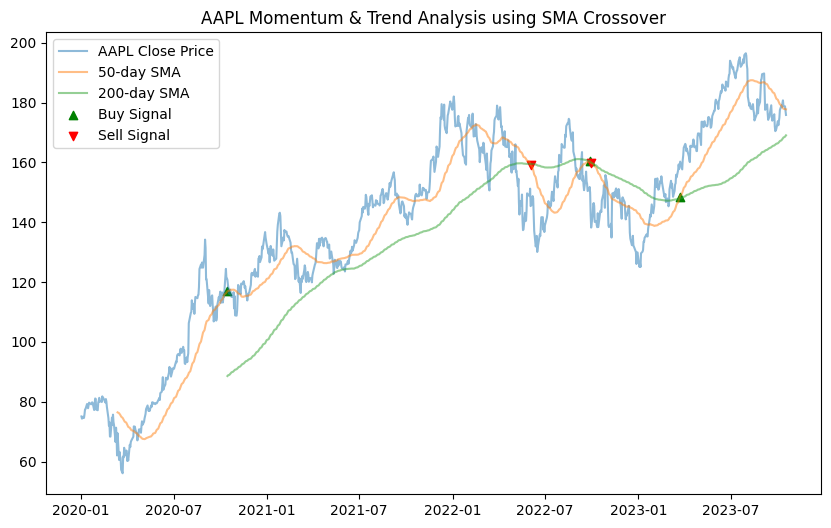

[*********************100%%**********************]  1 of 1 completed


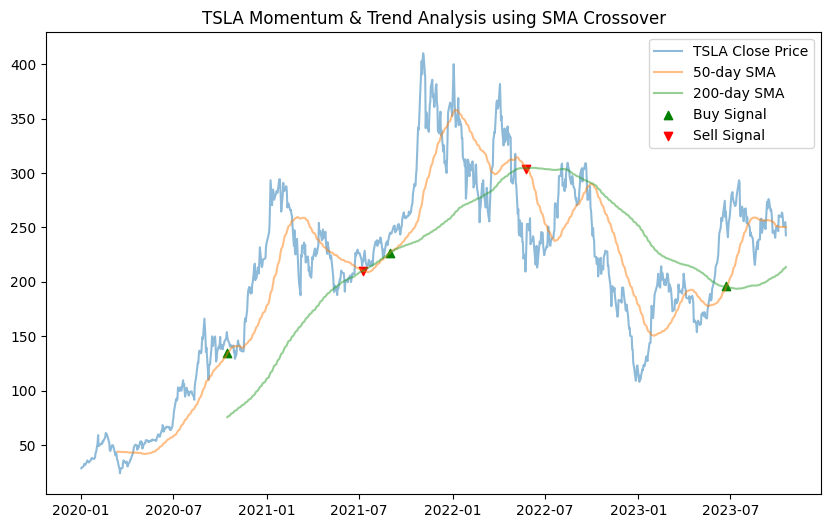

[*********************100%%**********************]  1 of 1 completed


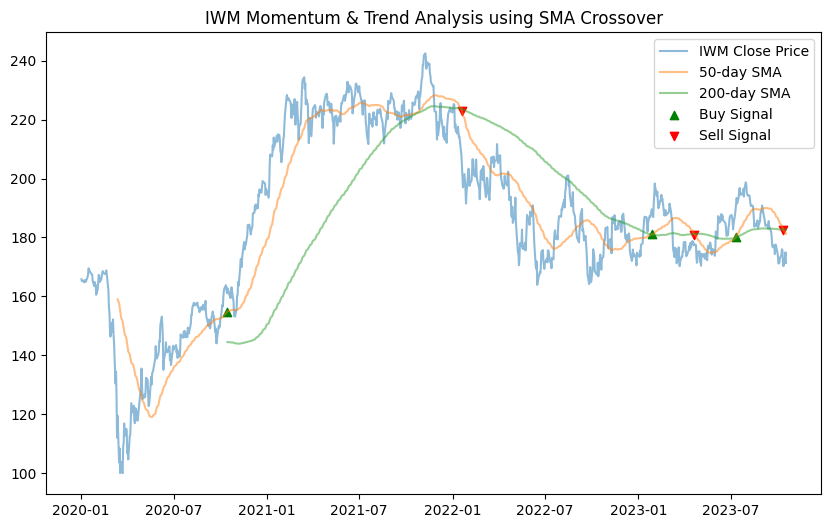

[*********************100%%**********************]  1 of 1 completed


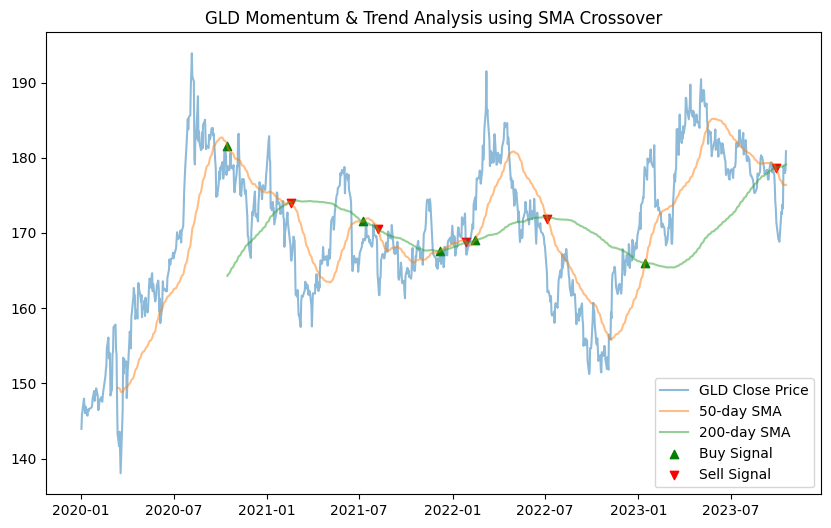

[*********************100%%**********************]  1 of 1 completed


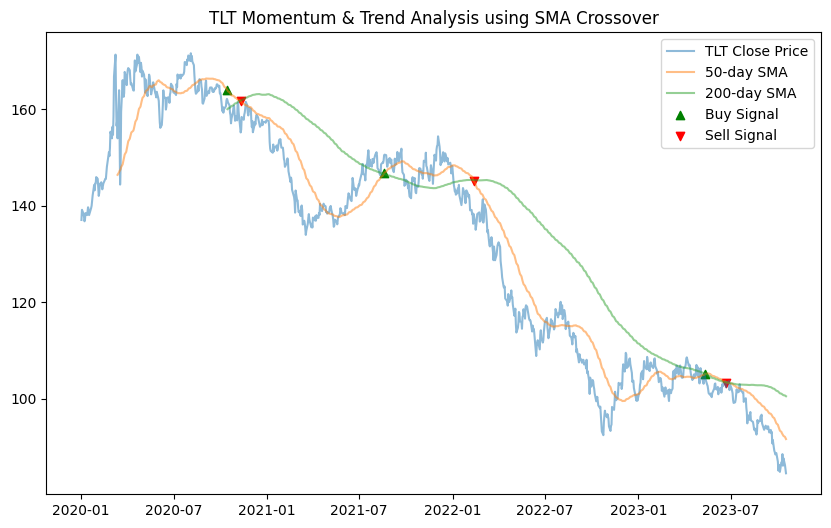

[*********************100%%**********************]  1 of 1 completed


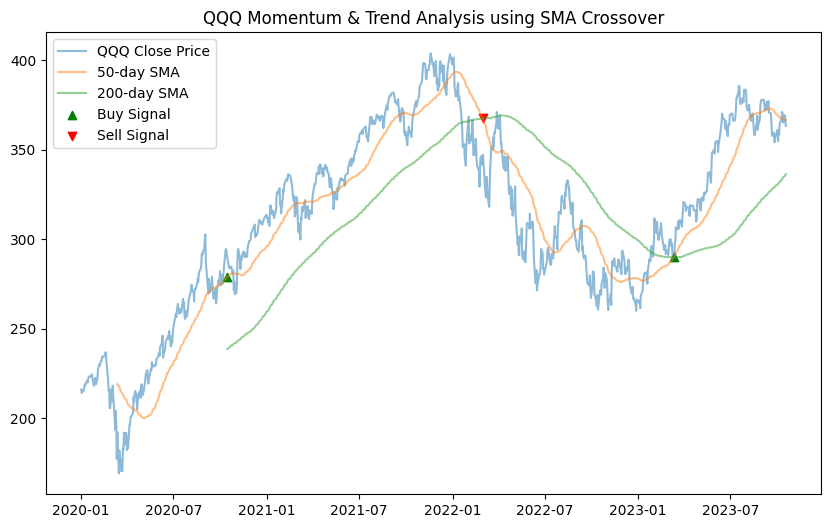

In [3]:
def fetch_data(ticker_symbol):
    # Fetch historical data
    data = yf.download(ticker_symbol, start="2020-01-01", end="2023-10-19")
    return data['Close']

def sma_crossover(data, short_window=50, long_window=200):
    signals = pd.DataFrame(index=data.index)
    signals['price'] = data
    signals['short_mavg'] = data.rolling(window=short_window).mean()
    signals['long_mavg'] = data.rolling(window=long_window).mean()

    # Create signals
    signals['signal'] = 0.0
    signals.iloc[short_window:, signals.columns.get_loc('signal')] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)
    signals['positions'] = signals['signal'].diff()

    return signals

tickers = ['AAPL', 'TSLA', 'IWM', 'GLD', 'TLT', 'QQQ']

for ticker in tickers:
    # Fetch data
    data = fetch_data(ticker)

    # Generate signals
    signals = sma_crossover(data)

    # Plotting
    plt.figure(figsize=(10,6))
    plt.plot(data, label=f'{ticker} Close Price', alpha=0.5)
    plt.plot(signals['short_mavg'], label='50-day SMA', alpha=0.5)
    plt.plot(signals['long_mavg'], label='200-day SMA', alpha=0.5)
    plt.scatter(signals[signals['positions'] == 1.0].index,
                signals['short_mavg'][signals['positions'] == 1.0],
                label='Buy Signal', marker='^', color='g', alpha=1)
    plt.scatter(signals[signals['positions'] == -1.0].index,
                signals['short_mavg'][signals['positions'] == -1.0],
                label='Sell Signal', marker='v', color='r', alpha=1)
    plt.title(f'{ticker} Momentum & Trend Analysis using SMA Crossover')
    plt.legend()
    plt.show()